In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("Materiales/rating-and-performance-nonull.csv", index_col = 0 ) 

1.  ¿Cómo se distribuyen los precios de los productos?

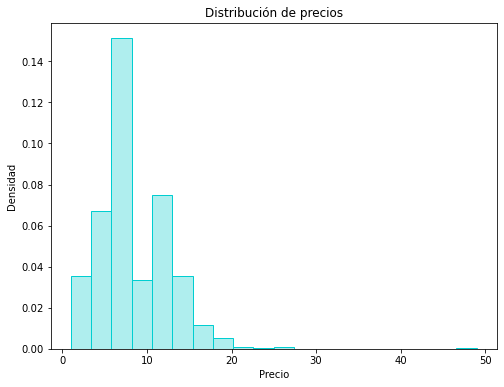

In [3]:
plt.figure(figsize=(8, 6))

plt.hist(x = "price", 
         data = df, 
         bins = 20,
         color = "paleturquoise", 
         edgecolor = "darkturquoise", 
         density = True
         )

plt.title("Distribución de precios")

plt.xlabel("Precio")

plt.ylabel("Densidad");

2. ¿Cuál es la relación entre el precio y la calificación promedio de los productos? 

In [4]:
df_precio = df.groupby('price')['rating_x'].mean().reset_index()

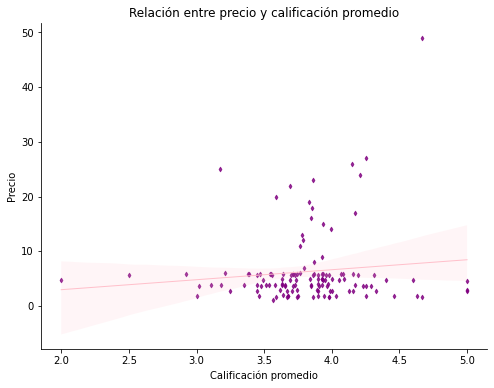

In [5]:
plt.figure(figsize=(8, 6))

sns.regplot(x = "rating_x", 
            y = "price", 
            data = df_precio, 
            marker = "d", 
            line_kws = {"color": "pink", "linewidth": 1}, 
            scatter_kws = {"color": "purple", "s": 10} 
            )


plt.xlabel("Calificación promedio")
plt.ylabel("Precio")


plt.title("Relación entre precio y calificación promedio")


plt.gca().spines['right'].set_visible(False) 
plt.gca().spines["top"].set_visible(False) 

3. ¿Qué porcentaje de productos tiene el distintivo "Producto local"?

In [6]:
df_local = df.groupby('badge_local_product')['price'].count() 
df_local = df_local.reset_index()
df_local.columns = ['badge' , 'total']

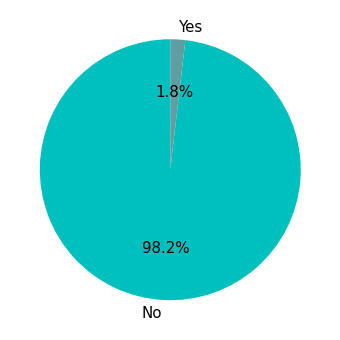

In [7]:
colores = ["c", "cadetblue"]

plt.figure(figsize=(8, 6))

plt.pie("total", labels= "badge",
        data = df_local, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 15}, 
        startangle=90);

# De acuerdo con el gráfico, un 98,2% de productos posee el distintivo de producto local

4.  ¿Qué porcentaje de productos tiene el distintivo "Buena calidad del producto".

In [8]:
df_good = df.groupby('badge_product_quality')['price'].count() 
df_good = df_good.reset_index()
df_good.columns = ['quality' , 'total']

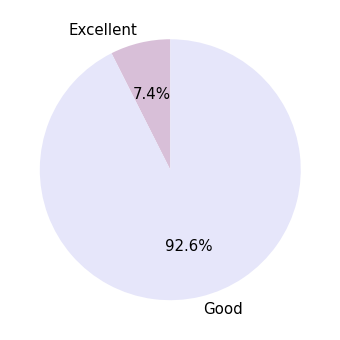

In [9]:
colores = ["thistle", "lavender"]

plt.figure(figsize=(8, 6))

plt.pie("total", labels= "quality",
        data = df_good, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 15}, 
        startangle=90);

# Según el gráfico, un 92,6% de productos tiene el distintivo de buena calidad

5.  ¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (`uses_ad_boosts`) o no?

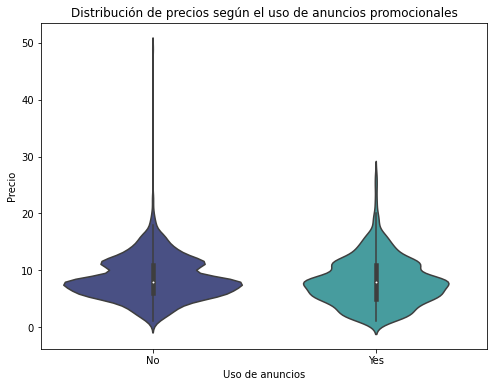

In [10]:
plt.figure(figsize=(8, 6))

sns.violinplot(x = 'uses_ad_boosts', 
               y = 'price', 
               data = df,
               palette = "mako")

plt.title('Distribución de precios según el uso de anuncios promocionales')

plt.xlabel('Uso de anuncios')
plt.ylabel('Precio');

6. ¿Existe una relación entre el uso de anuncios y las unidades vendidas? 

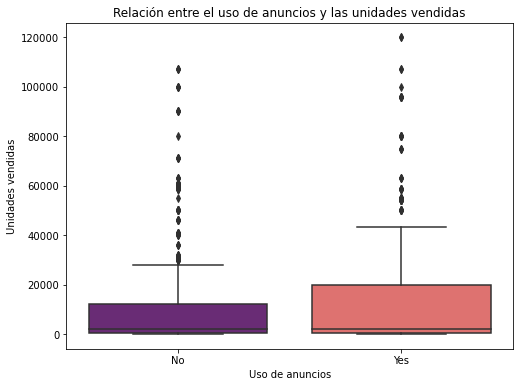

In [11]:
plt.figure(figsize=(8, 6))

sns.boxplot(x = "uses_ad_boosts",
            y = "total_units_sold", 
            data = df, 
            palette= "magma")

plt.title('Relación entre el uso de anuncios y las unidades vendidas')

plt.xlabel('Uso de anuncios')
plt.ylabel('Unidades vendidas');

# De acuerdo con el gráfico sí existe una relación entre el uso de anuncios y las unidades vendidas, 
# ya que aquellos productos que se anuncian se venden más

7. ¿Cuál es la distribución de las calificaciones de los empleados (`rating_employee`) para los productos que tienen el distintivo "Buena calidad del producto" (`badge_product_quality`) y para los que no lo tienen? Haced que las dos gráficas tengan la misma escala en los dos ejes.

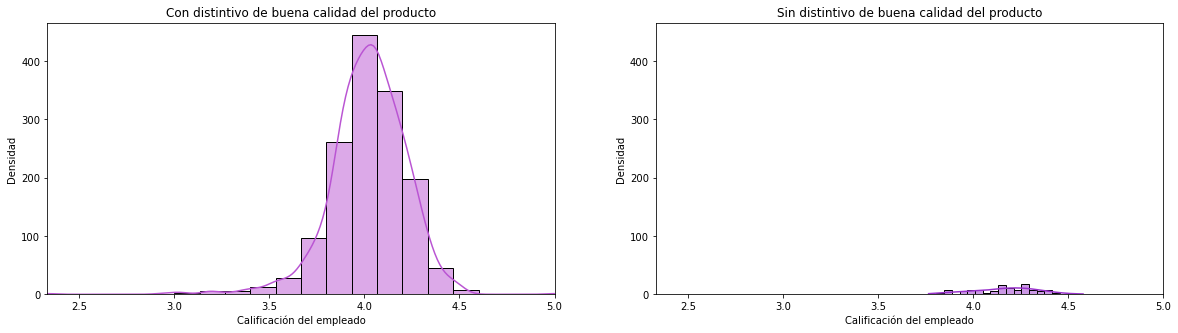

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))


ax0 = sns.histplot(x="rating_y", 
                   data=df[df['badge_product_quality'] == 'Good'], 
                   color="mediumorchid", 
                   kde=True, 
                   bins=20,
                   ax=axes[0])

axes[0].set_title('Con distintivo de buena calidad del producto')
axes[0].set_xlabel('Calificación del empleado')
axes[0].set_ylabel('Densidad')

ax1 = sns.histplot(x="rating_y", 
                   data=df[df['badge_product_quality'] != 'Good'], 
                   color="darkorchid", 
                   kde=True, 
                   bins=20,
                   ax=axes[1])

axes[1].set_title('Sin distintivo de buena calidad del producto')
axes[1].set_xlabel('Calificación del empleado')
axes[1].set_ylabel('Densidad')

# Obtiene los límites máximos y mínimos de ambos gráficos
max_rating = max(df['rating_y'])
min_rating = min(df['rating_y'])
max_density = max(ax0.get_ylim()[1], ax1.get_ylim()[1])

# Ajusta los límites de los ejes x e y para que sean iguales en ambos gráficos
for ax in [ax0, ax1]:
    ax.set_xlim(min_rating, max_rating)
    ax.set_ylim(0, max_density)

8. ¿Qué países reciben más productos de este conjunto de datos? Muestra un gráfico de barras horizontales.

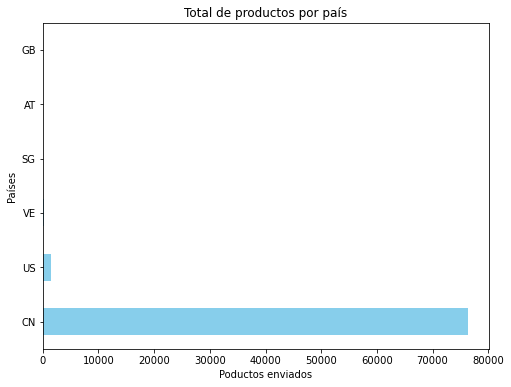

In [25]:
df_paises = df.groupby('origin_country')['inventory_total'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))

df_paises.plot(kind='barh',
               color = 'skyblue')

plt.title('Total de productos por país')

plt.ylabel('Países')
plt.xlabel('Poductos enviados');

9. ¿Cómo varía el precio promedio de los productos por país de origen?

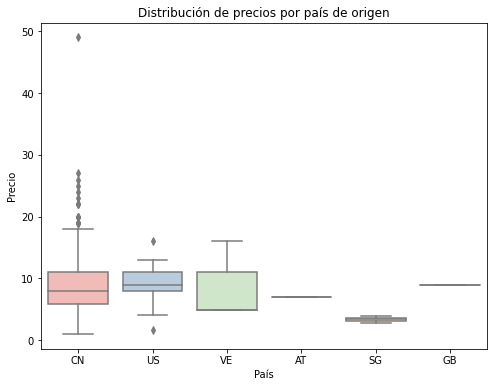

In [34]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='origin_country', 
            y='price',
            data = df,
            palette = 'Pastel1'
           )

plt.title('Distribución de precios por país de origen')

plt.xlabel('País')
plt.ylabel('Precio');

10. ¿Cuál es la relación entre el precio de envío y las unidades vendidas?

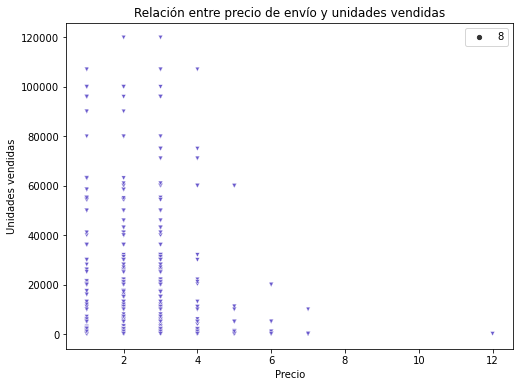

In [36]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='shipping_option_price', 
                y='total_units_sold',
                data=df,
                size = 8,
                marker = 'v',
                color = 'slateblue'
                )

plt.title('Relación entre precio de envío y unidades vendidas')

plt.xlabel('Precio')
plt.ylabel('Unidades vendidas');

11. Compara diferentes distribuciones de precios de productos en función de si tienen el distintivo "Producto local" o "Buena calidad del producto". Tendréis que crear dos gráficas en un subplot, en la primera poner los precios de los productos locales ("badge_local_product")

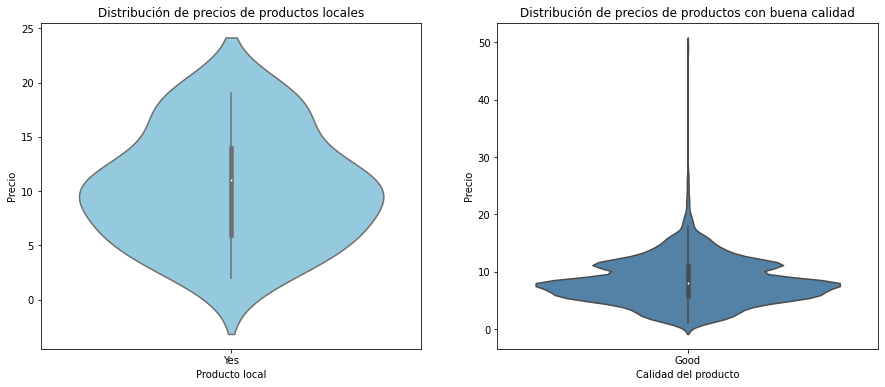

In [40]:
# Crear un subplot con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de violín para los precios de productos locales
sns.violinplot(data = df[df['badge_local_product'] == 'Yes'], 
               x = 'badge_local_product', 
               y = 'price', 
               color = 'skyblue',
               ax = axs[0])

axs[0].set_title('Distribución de precios de productos locales')

axs[0].set_xlabel('Producto local')
axs[0].set_ylabel('Precio');

# Gráfico de violín para los precios de productos con buena calidad
sns.violinplot(data=df[df['badge_product_quality'] == 'Good'], 
               x='badge_product_quality', 
               y='price', 
               color = 'steelblue',
               ax=axs[1])

axs[1].set_title('Distribución de precios de productos con buena calidad')

axs[1].set_xlabel('Calidad del producto')
axs[1].set_ylabel('Precio');